In [1]:
#access the data files

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math

# **Load the data**

In [14]:
Bank_full = pd.read_csv('/content/drive/MyDrive/DB2/bank-full.csv', delimiter=";")
Bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [21]:
Bank_full.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [15]:
Bank_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
# Check for missing values
print(Bank_full.isnull().sum())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
False


In [19]:
#check Dublicates
print(Bank_full.duplicated().any())

False


In [30]:
Bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [55]:
# Remove unknown values form dataset
Bank_full.drop(Bank_full[Bank_full['job'] == 'unknown'].index, inplace=True)
Bank_full.drop(Bank_full[Bank_full['marital'] == 'unknown'].index, inplace=True)
Bank_full.drop(Bank_full[Bank_full['education'] == 'unknown'].index, inplace=True)
Bank_full.drop(Bank_full[Bank_full['default'] == 'unknown'].index, inplace=True)
Bank_full.drop(Bank_full[Bank_full['housing'] == 'unknown'].index, inplace=True)
Bank_full.drop(Bank_full[Bank_full['loan'] == 'unknown'].index, inplace=True)
Bank_full.drop(Bank_full[Bank_full['contact'] == 'unknown'].index, inplace=True)
Bank_full.drop(Bank_full[Bank_full['poutcome'] == 'unknown'].index, inplace=True)

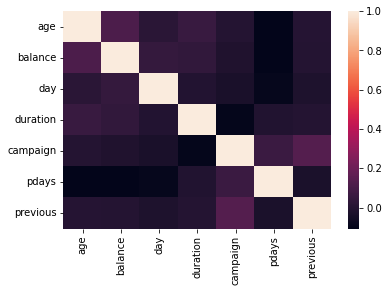

In [56]:
# Correlation matrix
sns.heatmap(Bank_full.corr())

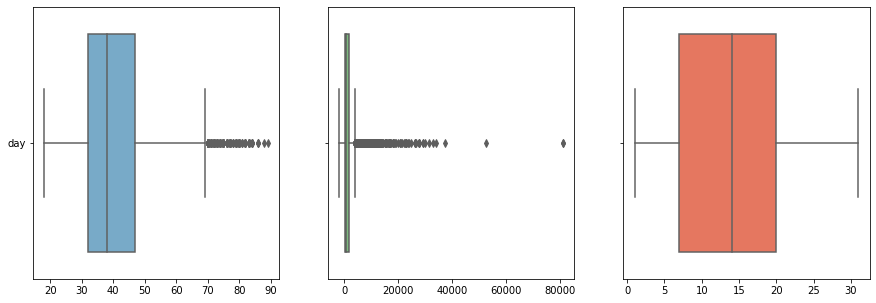

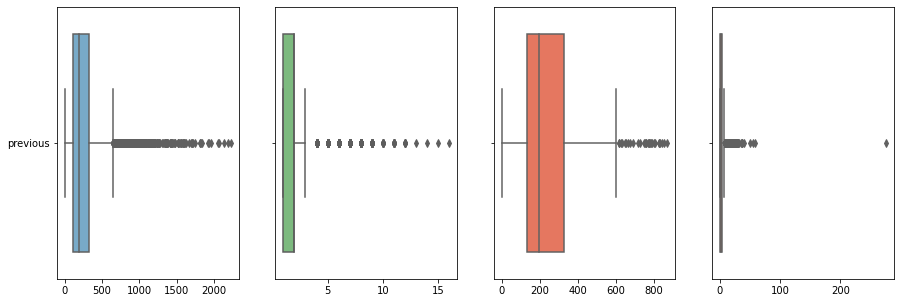

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.boxplot(ax=axes[0],data=Bank_full[["age"]], orient="h",palette="Blues")
sns.boxplot(ax=axes[1],data=Bank_full[["balance"]], orient="h",palette="Greens")
sns.boxplot(ax=axes[2],data=Bank_full[["day"]], orient="h",palette="Reds")


fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
sns.boxplot(ax=axes[0],data=Bank_full[["duration"]], orient="h",palette="Blues")
sns.boxplot(ax=axes[1],data=Bank_full[["campaign"]], orient="h",palette="Greens")
sns.boxplot(ax=axes[2],data=Bank_full[["pdays"]], orient="h",palette="Reds")
sns.boxplot(ax=axes[3],data=Bank_full[["previous"]], orient="h",palette="Reds")



In [58]:
#Remove outliers using IQ


Q1 = Bank_full.quantile(0.25)
Q3 = Bank_full.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Bank_data_out = Bank_full[~((Bank_full < (Q1 - 1.5 * IQR)) |(Bank_full > (Q3 + 1.5 * IQR))).any(axis=1)]
print(Bank_data_out.shape)


age           15.00
balance     1571.75
day           13.00
duration     211.00
campaign       1.00
pdays        193.00
previous       3.00
dtype: float64
(5413, 17)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


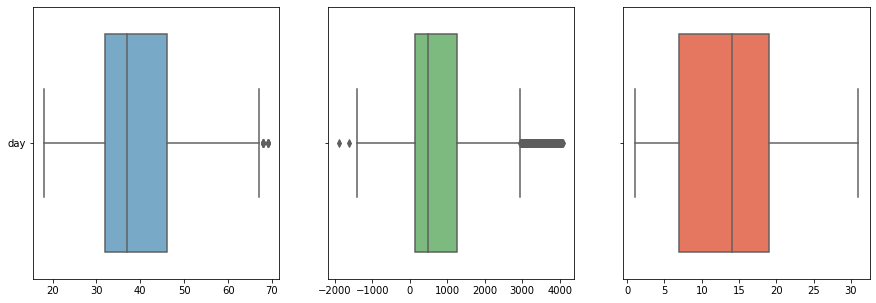

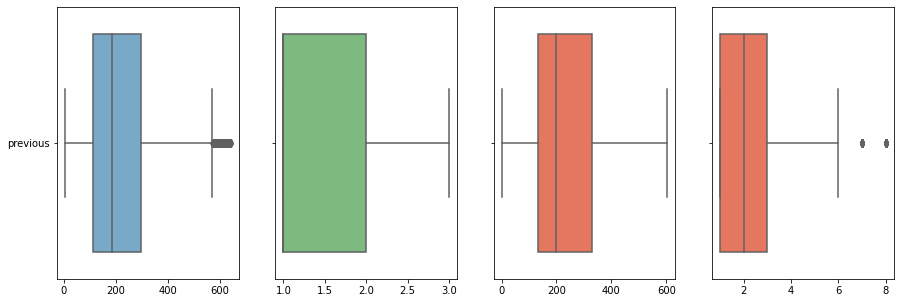

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.boxplot(ax=axes[0],data=Bank_data_out[["age"]], orient="h",palette="Blues")
sns.boxplot(ax=axes[1],data=Bank_data_out[["balance"]], orient="h",palette="Greens")
sns.boxplot(ax=axes[2],data=Bank_data_out[["day"]], orient="h",palette="Reds")


fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
sns.boxplot(ax=axes[0],data=Bank_data_out[["duration"]], orient="h",palette="Blues")
sns.boxplot(ax=axes[1],data=Bank_data_out[["campaign"]], orient="h",palette="Greens")
sns.boxplot(ax=axes[2],data=Bank_data_out[["pdays"]], orient="h",palette="Reds")
sns.boxplot(ax=axes[3],data=Bank_data_out[["previous"]], orient="h",palette="Reds")

